In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv ("Book6 - Copy.csv")

In [3]:
df

,الاسم,رقم هوية الطالب,تاريخ الميلاد,حالة خاصة,مكان الولادة,الصف
0,أحلام علي عصام حمود,439935271,10/12/2018,لا يوجد,نابلس,الأول
1,أسيل أحمد شاهر ازعر,436216204,7/5/2015,لا يوجد,نابلس,الرابع
2,أسيل محمد أحمد شافعي,435450804,17-04-2015,اعفاء الاخوة,نابلس,الرابع
3,آيه فايز محمد اقرع,436167654,19-07-2015,لا يوجد,سلفيت,الرابع
4,اريام محمد عادل سلمان,438679581,6/2/2017,اعفاء الاخوة,نابلس,الثاني
...,...,...,...,...,...,...
497,منار شاكر موسى نجم,430923151,19-02-2012,لا يوجد,نابلس,السادس
498,نغم عرفات محمد عمله,430632505,19-12-2011,لا يوجد,نابلس,السادس
499,هبه راسم محمد اقرع,431475649,27-04-2011,لا يوجد,نابلس,السادس
500,هدى مهدي صابر عمله,430344804,18-07-2011,لا يوجد,نابلس,السادس


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   الاسم            502 non-null    object
 1   رقم هوية الطالب  502 non-null    int64 
 2   تاريخ الميلاد    502 non-null    object
 3   حالة خاصة        502 non-null    object
 4   مكان الولادة     502 non-null    object
 5   الصف             502 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.7+ KB


In [5]:
df.describe()

,رقم هوية الطالب
count,5.020000e+02
mean,4.334991e+08
std,5.099196e+06
min,4.145005e+08
25%,4.302935e+08
50%,4.345626e+08
75%,4.378109e+08
max,4.502555e+08


In [6]:
df.isnull().sum()

الاسم              0
رقم هوية الطالب    0
تاريخ الميلاد      0
حالة خاصة          0
مكان الولادة       0
الصف               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df_copy=df.copy()

In [9]:
df_copy

,الاسم,رقم هوية الطالب,تاريخ الميلاد,حالة خاصة,مكان الولادة,الصف
0,أحلام علي عصام حمود,439935271,10/12/2018,لا يوجد,نابلس,الأول
1,أسيل أحمد شاهر ازعر,436216204,7/5/2015,لا يوجد,نابلس,الرابع
2,أسيل محمد أحمد شافعي,435450804,17-04-2015,اعفاء الاخوة,نابلس,الرابع
3,آيه فايز محمد اقرع,436167654,19-07-2015,لا يوجد,سلفيت,الرابع
4,اريام محمد عادل سلمان,438679581,6/2/2017,اعفاء الاخوة,نابلس,الثاني
...,...,...,...,...,...,...
497,منار شاكر موسى نجم,430923151,19-02-2012,لا يوجد,نابلس,السادس
498,نغم عرفات محمد عمله,430632505,19-12-2011,لا يوجد,نابلس,السادس
499,هبه راسم محمد اقرع,431475649,27-04-2011,لا يوجد,نابلس,السادس
500,هدى مهدي صابر عمله,430344804,18-07-2011,لا يوجد,نابلس,السادس


In [10]:
df1= pd.read_csv ("Book1.csv")

In [11]:
df1

,الاسم,اللغة العربية,اللغة الإنجليزية,الرياضيات
0,اسماء فايز محمد اقرع,ممتاز,جيد جدا,ممتاز
1,الما سائد محمد اقرع,ممتاز,جيد جدا,ممتاز
2,بيسان فادي ماجد عوده,ممتاز,جيد جدا,ممتاز
3,تالا حماده عبد المطلب شحروج,ممتاز,جيد جدا,جيد جدا
4,تالين حماده عبد المطلب شحروج,ممتاز,جيد جدا,جيد جدا
...,...,...,...,...
486,ميار عمر خميس عمله,50,40,41
487,ميس ابراهيم محمد زياده,73,71,76
488,نور خليل محمد اقرع,78,68,75
489,هبه خيري عايش ازعر,67,50,56


In [12]:
df1_copy=df1.copy()

In [13]:
df1.isnull().sum()

الاسم               0
اللغة العربية       0
اللغة الإنجليزية    0
الرياضيات           0
dtype: int64

In [14]:
df_copy=pd.merge(df_copy,df1_copy, on="الاسم", how="left")

In [15]:
df_copy

,الاسم,رقم هوية الطالب,تاريخ الميلاد,حالة خاصة,مكان الولادة,الصف,اللغة العربية,اللغة الإنجليزية,الرياضيات
0,أحلام علي عصام حمود,439935271,10/12/2018,لا يوجد,نابلس,الأول,ممتاز,جيد جدا,ممتاز
1,أسيل أحمد شاهر ازعر,436216204,7/5/2015,لا يوجد,نابلس,الرابع,جيد جدا,جيد,جيد
2,أسيل محمد أحمد شافعي,435450804,17-04-2015,اعفاء الاخوة,نابلس,الرابع,ممتاز,جيد جدا,متوسط
3,آيه فايز محمد اقرع,436167654,19-07-2015,لا يوجد,سلفيت,الرابع,متوسط,مقبول,مقبول
4,اريام محمد عادل سلمان,438679581,6/2/2017,اعفاء الاخوة,نابلس,الثاني,ممتاز,جيد جدا,ممتاز
...,...,...,...,...,...,...,...,...,...
497,منار شاكر موسى نجم,430923151,19-02-2012,لا يوجد,نابلس,السادس,70,74,75
498,نغم عرفات محمد عمله,430632505,19-12-2011,لا يوجد,نابلس,السادس,74,80,64
499,هبه راسم محمد اقرع,431475649,27-04-2011,لا يوجد,نابلس,السادس,75,84,78
500,هدى مهدي صابر عمله,430344804,18-07-2011,لا يوجد,نابلس,السادس,62,62,54


In [16]:
df2= pd.read_csv ("absentReport_20251106.csv")

In [17]:
df2

,الاسم,عدد الغيابات
0,أسيل أحمد شاهر ازعر,1
1,أسيل محمد أحمد شافعي,1
2,آيه فايز محمد اقرع,2
3,استبرق بديع مهند العقرباوي,5
4,اسراء معتصم جمال اقرع,2
...,...,...
432,ميار عمر خميس عمله,1
433,ميس ابراهيم محمد زياده,3
434,نور خليل محمد اقرع,2
435,هبه خيري عايش ازعر,11


In [18]:
df_copy=pd.merge(df_copy,df2, on="الاسم", how="left",sort=False)

In [19]:
df_copy

,الاسم,رقم هوية الطالب,تاريخ الميلاد,حالة خاصة,مكان الولادة,الصف,اللغة العربية,اللغة الإنجليزية,الرياضيات,عدد الغيابات
0,أحلام علي عصام حمود,439935271,10/12/2018,لا يوجد,نابلس,الأول,ممتاز,جيد جدا,ممتاز,NaN
1,أسيل أحمد شاهر ازعر,436216204,7/5/2015,لا يوجد,نابلس,الرابع,جيد جدا,جيد,جيد,1.0
2,أسيل محمد أحمد شافعي,435450804,17-04-2015,اعفاء الاخوة,نابلس,الرابع,ممتاز,جيد جدا,متوسط,1.0
3,آيه فايز محمد اقرع,436167654,19-07-2015,لا يوجد,سلفيت,الرابع,متوسط,مقبول,مقبول,2.0
4,اريام محمد عادل سلمان,438679581,6/2/2017,اعفاء الاخوة,نابلس,الثاني,ممتاز,جيد جدا,ممتاز,NaN
...,...,...,...,...,...,...,...,...,...,...
520,منار شاكر موسى نجم,430923151,19-02-2012,لا يوجد,نابلس,السادس,70,74,75,13.0
521,نغم عرفات محمد عمله,430632505,19-12-2011,لا يوجد,نابلس,السادس,74,80,64,3.0
522,هبه راسم محمد اقرع,431475649,27-04-2011,لا يوجد,نابلس,السادس,75,84,78,15.0
523,هدى مهدي صابر عمله,430344804,18-07-2011,لا يوجد,نابلس,السادس,62,62,54,6.0


In [20]:
df_copy.to_csv("students_clustered.csv", index=False)

In [21]:
df_copy.isna().sum()

الاسم                 0
رقم هوية الطالب       0
تاريخ الميلاد         0
حالة خاصة             0
مكان الولادة          0
الصف                  0
اللغة العربية        11
اللغة الإنجليزية     11
الرياضيات            11
عدد الغيابات        145
dtype: int64

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   الاسم             525 non-null    object 
 1   رقم هوية الطالب   525 non-null    int64  
 2   تاريخ الميلاد     525 non-null    object 
 3   حالة خاصة         525 non-null    object 
 4   مكان الولادة      525 non-null    object 
 5   الصف              525 non-null    object 
 6   اللغة العربية     514 non-null    object 
 7   اللغة الإنجليزية  514 non-null    object 
 8   الرياضيات         514 non-null    object 
 9   عدد الغيابات      380 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 41.1+ KB


In [23]:
df_copy.describe()

,رقم هوية الطالب,عدد الغيابات
count,5.250000e+02,380.000000
mean,4.334549e+08,3.771053
std,5.008506e+06,3.659333
min,4.145005e+08,1.000000
25%,4.303474e+08,1.000000
50%,4.342534e+08,2.000000
75%,4.375887e+08,5.000000
max,4.502555e+08,24.000000


## DATA CLEANING
 Drop non-informative columns

In [24]:
columns_to_drop = [
    "الاسم",
    "رقم هوية الطالب",
    "تاريخ الميلاد",
    "مكان الولادة"
]

df_copy = df_copy.drop(columns=[c for c in columns_to_drop if c in df_copy.columns])


In [25]:
def grade_to_score(grade):
    # إذا القيمة NaN
    if pd.isna(grade):
        return np.nan

    # إذا القيمة رقم (float أو int) → لا نغيرها
    if isinstance(grade, (int, float)):
        return grade

    # إذا القيمة نص
    grade = str(grade).strip()

    if grade == "ممتاز":
        return 95
    elif grade == "جيد جدا":
        return 85
    
    elif grade == "جيد":
        return 75
    elif grade == "متوسط":
        return 65
    elif grade == "مقبول":
        return 55
    else:
        return np.nan
target_grades = ["الأول", "الثاني", "الثالث", "الرابع"]
mask = df_copy["الصف"].isin(target_grades)

for col in ["اللغة العربية", "اللغة الإنجليزية", "الرياضيات"]:
    df_copy.loc[mask, col] = df_copy.loc[mask, col].apply(grade_to_score)

In [26]:
#Handle missing values
df_copy["عدد الغيابات"] = df_copy["عدد الغيابات"].fillna(0)


In [27]:
df_copy.isna().sum()

حالة خاصة            0
الصف                 0
اللغة العربية       11
اللغة الإنجليزية    11
الرياضيات           11
عدد الغيابات         0
dtype: int64

In [28]:
df_copy.dropna(inplace=True)

In [29]:
df_copy.isna().sum()

حالة خاصة           0
الصف                0
اللغة العربية       0
اللغة الإنجليزية    0
الرياضيات           0
عدد الغيابات        0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df_copy.head(20)

,حالة خاصة,الصف,اللغة العربية,اللغة الإنجليزية,الرياضيات,عدد الغيابات
0,لا يوجد,الأول,95,85,95,0.0
1,لا يوجد,الرابع,85,75,75,1.0
2,اعفاء الاخوة,الرابع,95,85,65,1.0
3,لا يوجد,الرابع,65,55,55,2.0
4,اعفاء الاخوة,الثاني,95,85,95,0.0
5,اعفاء الاخوة,الثاني,55,65,75,5.0
6,اعفاء الاخوة,الثالث,75,75,85,0.0
7,لا يوجد,الثالث,85,85,85,2.0
8,لا يوجد,الأول,95,85,95,4.0
9,اعفاء الاخوة,الرابع,95,95,95,0.0


## FEATURE SELECTION

In [32]:
features = ["اللغة العربية", "اللغة الإنجليزية", "الرياضيات", "عدد الغيابات"]
X = df_copy[features].values


## NORMALIZATION (VERY IMPORTANT)

In [33]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


## FIND OPTIMAL NUMBER OF CLUSTERS (k)

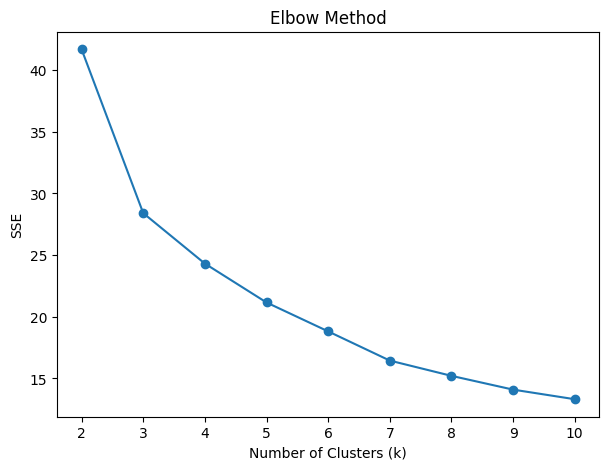

In [34]:
#Elbow Method (SSE)
sse = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()


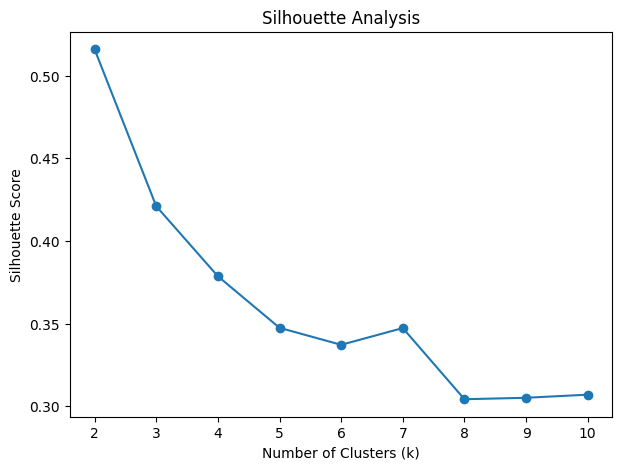

In [35]:
#Silhouette Score
sil_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7,5))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


## TRAIN FINAL MODEL

## kmeans Clustering

In [37]:
df_copy[features] = df_copy[features].apply(pd.to_numeric, errors='coerce')


In [50]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

df_copy["Cluster"] = labels_kmeans

## MODEL EVALUATION

In [51]:
sil_kmeans= silhouette_score(X_scaled, labels_kmeans)
print("Silhouette Score:", sil_kmeans)


Silhouette Score: 0.42096985625537453


## Hierarchical Clustering (Agglomerative)

In [52]:
hierarchical = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"   # best with Euclidean distance
)

labels_hier = hierarchical.fit_predict(X_scaled)
sil_hier = silhouette_score(X_scaled, labels_hier)

df_copy["Hierarchical_Cluster"] = labels_hier


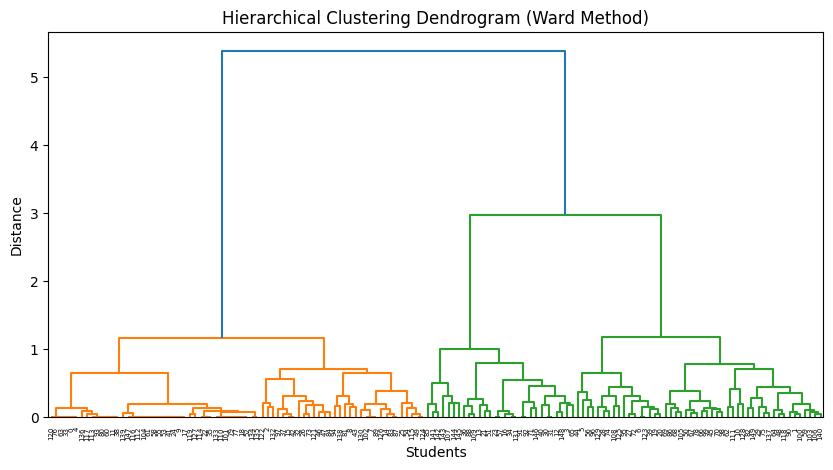

In [53]:
sample = X_scaled[:150]

Z = linkage(sample, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()


## DBSCAN (Density-Based)

In [54]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

df_copy["DBSCAN_Cluster"] = labels_dbscan


In [55]:
mask = labels_dbscan != -1

if len(set(labels_dbscan[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
else:
    sil_dbscan = -1


In [56]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions (for visualization only)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


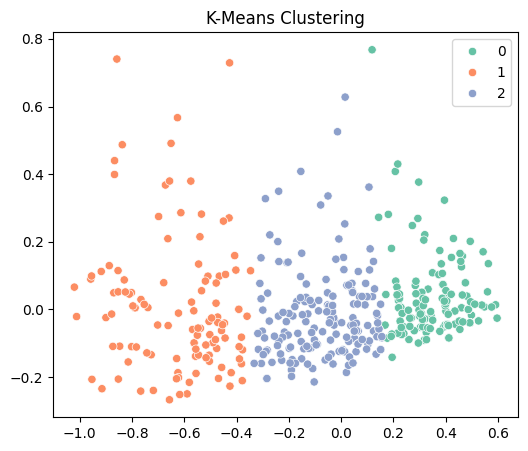

In [67]:
#K-Means Visualization
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette="Set2")
plt.title("K-Means Clustering")
plt.show()


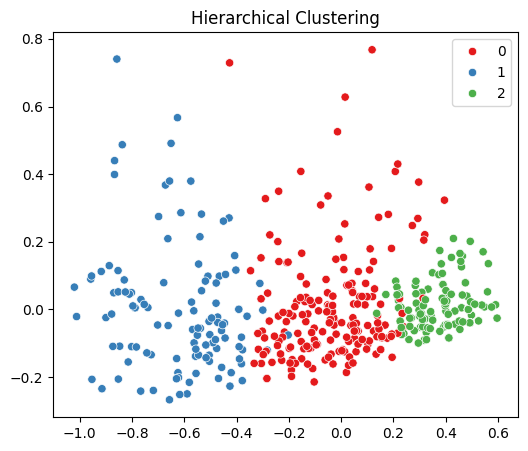

In [58]:
#Hierarchical Visualization
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_hier, palette="Set1")
plt.title("Hierarchical Clustering")
plt.show()


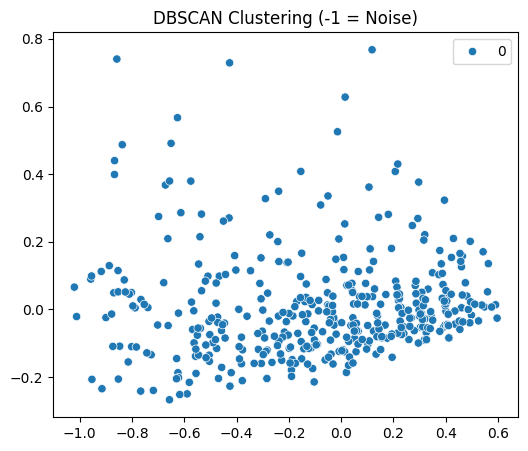

In [59]:
#DBSCAN Visualization
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_dbscan, palette="tab10")
plt.title("DBSCAN Clustering (-1 = Noise)")
plt.show()


In [60]:
#Comparison Table
comparison = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [sil_kmeans, sil_hier, sil_dbscan]
})

comparison


,Algorithm,Silhouette Score
0,K-Means,0.420970
1,Hierarchical,0.400465
2,DBSCAN,-1.000000


## CLUSTER INTERPRETATION

In [70]:
cluster_summary = df_copy.groupby("Cluster")[features].mean()
print(cluster_summary)


         اللغة العربية  اللغة الإنجليزية  الرياضيات  عدد الغيابات
Cluster                                                          
0            91.313901         90.156951  91.591928      1.744395
1            56.262712         54.364407  49.974576      4.847458
2            75.867052         73.815029  72.791908      2.502890


## VISUALIZATION

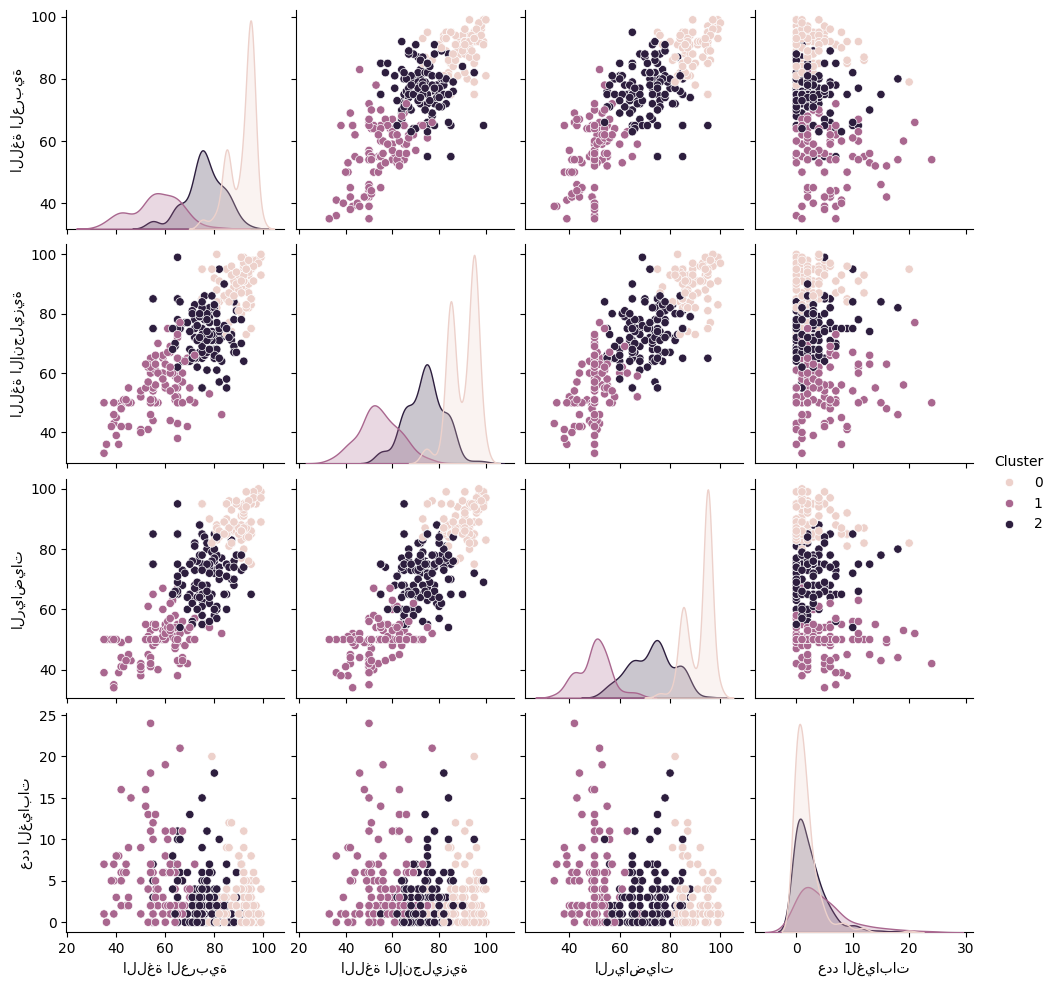

In [71]:
#Pairplot
sns.pairplot(df_copy, hue="Cluster", vars=features)
plt.show()


## Cluster distribution

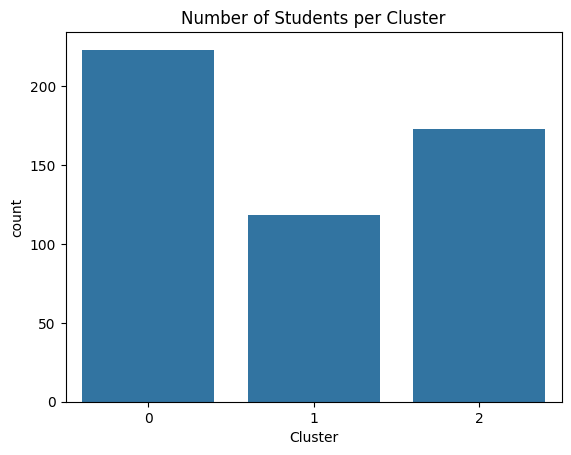

In [72]:
sns.countplot(x="Cluster", data=df_copy)
plt.title("Number of Students per Cluster")
plt.show()


## FINAL CONCLUSION

“K-Means clustering was applied as an unsupervised learning technique to group students based on academic performance. After converting categorical grades to numerical values and normalizing the data, the optimal number of clusters was selected using the Silhouette Score. The resulting clusters represent distinct performance levels, which can assist educators in targeted academic interventions.”